# High Dimensional Data Analysis Day 1

In [1]:
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
cm.update(
    "rise",
    {
        "theme": "black",
        "transition": None,
        "start_slideshow_at": "selected",
        "enable_chalkboard": True,
        "chalkboard": {
            "color": ["rgb(225, 193, 7)", "rgb(30, 136, 229)"]
        },
     }
)

{'theme': 'black',
 'start_slideshow_at': 'selected',
 'enable_chalkboard': True,
 'chalkboard': {'color': ['rgb(225, 193, 7)', 'rgb(30, 136, 229)']}}

# Situation: predict house sales price from house characteristics

## starting point: can we predict high (top 10 %) vs not-high sale price category

# DATA: Ames housing dataset


See here python documentation: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

Also see here for more thorough documentation regarding the feature set: https://www.openml.org/d/42165

## load dataset

In [2]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

## view data

In [3]:
df = housing.data
df = df.astype({'Id':int})  # set data type of Id to int
df = df.set_index('Id')  # set Id column to be the index of the DataFrame
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal
2,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,FR2,...,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal
3,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal
4,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,Corner,...,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml
5,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,FR2,...,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60.0,RL,62.0,7917.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.0,8.0,2007.0,WD,Normal
1457,20.0,RL,85.0,13175.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,MnPrv,None,0.0,2.0,2010.0,WD,Normal
1458,70.0,RL,66.0,9042.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,GdPrv,Shed,2500.0,5.0,2010.0,WD,Normal


## all feature names

In [4]:
print(df.columns.tolist())

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

# How do I find out what these features mean? Data Dictionary

In [5]:
from IPython.display import display, Pretty

# the housing object contains a Data Dictionary for the DataFrame
text = Pretty(housing.DESCR)
display(text)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1

# Target Feature: SalePrice

In [6]:
# add target variable 'sales price' to data df from housing object
df[housing.target_names[0]] = housing.target.tolist()  
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## what does SalePrice look like?

In [7]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

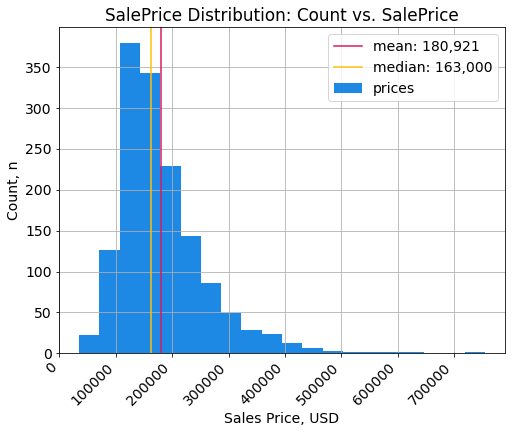

In [8]:
import helper_functions
helper_functions.plot_salesprice(df)

# Dataset Dimensions

In [9]:
df.describe()  # careful, non-numerical columns are excluded!

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
num_cols = df.describe().columns.tolist()

In [11]:
# DataFrame dimensions
print(f"{df.shape=}")

df.shape=(1460, 80)


# Curse of Dimensionality


cluster on dimensions... ?

1. 1460 observations
2. 79 features


Can all of those features be used in a model?

Would you want to use all of those features?

In [12]:
# two quick, but not generally applicable rules of thumb:
# TODO: if you mention, mention why they are considered rules of thumbs
import math
print('by square root of number of observerations: {:.2f}'.format(
    math.sqrt(housing.data.shape[0])
    )
)
print('')
print('one order of magnitude less than number of observations: {:.2f}'.format(
    1460/10
    )
)


by square root of number of observerations: 38.21

one order of magnitude less than number of observations: 146.00


# keep in mind...
1. data analysis and modeling can be very emprical - you need to try things out to see what works
2. if your data is iid or not, will impact how many obs

# Generally for a classifcation model

1. Distribution of features per target class matters a ton
2. More features mean more data

# create model to predict high sales price
## top 10 % of sales prices or not

In [13]:
df = helper_functions.split_df(df, split_col='SalePrice', top_split=20)

In [14]:
import pandas as pd
pd.concat([
    df[df['top_20']].head(10),
    df[~df['top_20']].head(10)
])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,top_20
Id,,,,,,,,,,,,,,,,,,,,,
5,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,FR2,...,None,None,None,0.0,12.0,2008.0,WD,Normal,250000.0,True
7,20.0,RL,75.0,10084.0,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0.0,8.0,2007.0,WD,Normal,307000.0,True
12,60.0,RL,85.0,11924.0,Pave,None,IR1,Lvl,AllPub,Inside,...,None,None,None,0.0,7.0,2006.0,New,Partial,345000.0,True
14,20.0,RL,91.0,10652.0,Pave,None,IR1,Lvl,AllPub,Inside,...,None,None,None,0.0,8.0,2007.0,New,Partial,279500.0,True
21,60.0,RL,101.0,14215.0,Pave,None,IR1,Lvl,AllPub,Corner,...,None,None,None,0.0,11.0,2006.0,New,Partial,325300.0,True
23,20.0,RL,75.0,9742.0,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0.0,9.0,2008.0,WD,Normal,230000.0,True
26,20.0,RL,110.0,14230.0,Pave,None,Reg,Lvl,AllPub,Corner,...,None,None,None,0.0,7.0,2009.0,WD,Normal,256300.0,True
28,20.0,RL,98.0,11478.0,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0.0,5.0,2010.0,WD,Normal,306000.0,True
35,120.0,RL,60.0,7313.0,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0.0,8.0,2007.0,WD,Normal,277500.0,True


In [15]:
# create one 'hues' value for top 30 and anothr for everything else - for plotting
df['hue'] = [1 if x else 0 for x in df['top_20']]

In [16]:
# choose numerical features to compare
cols = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'SalePrice', 'BsmtFinSF1', 'MSZoning',
        'hue']

In [17]:
# pull Chris E's jekyll lesson and notebook, compare notes.

# Plot correlations and histograms of those columns

1. What features should go in a model to predict high house price?

2. What features are correlated with high house price?

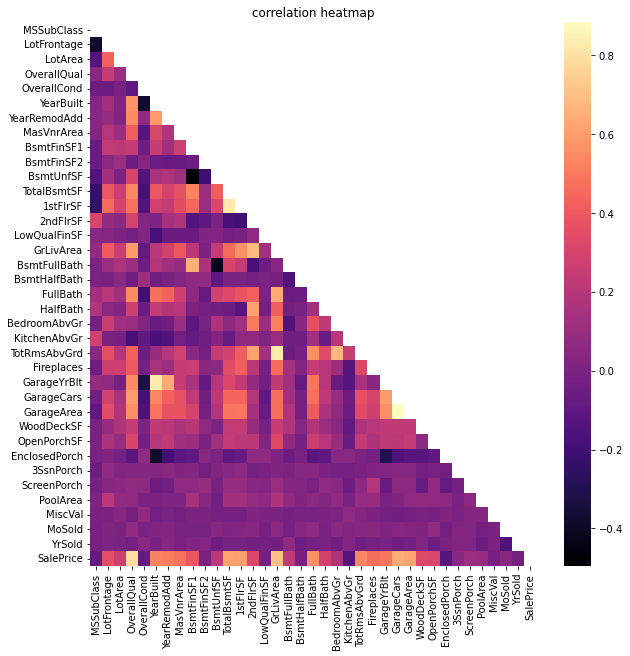

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#TODO: order based on sales price correlation values.
#breakout to helper_functions
fig, ax = plt.subplots(1, 1, figsize=(10,10))
corr_mat = df.drop(['top_20', 'hue'], axis=1).corr()
upper_triangle_mask = np.triu(corr_mat)
sns.heatmap(corr_mat, cmap='magma', ax=ax, mask=upper_triangle_mask)
plt.title('correlation heatmap')
plt.show()

## check top 5 highest correlation values

In [19]:
corr_mat['SalePrice'].sort_values(ascending=False)[1:6]

OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64

In [20]:
corr_cols = corr_mat['SalePrice'].sort_values(ascending=False)[1:6].index.tolist()

In [21]:
corr_cols

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']

# Create Pairplots of the top five most correlated values

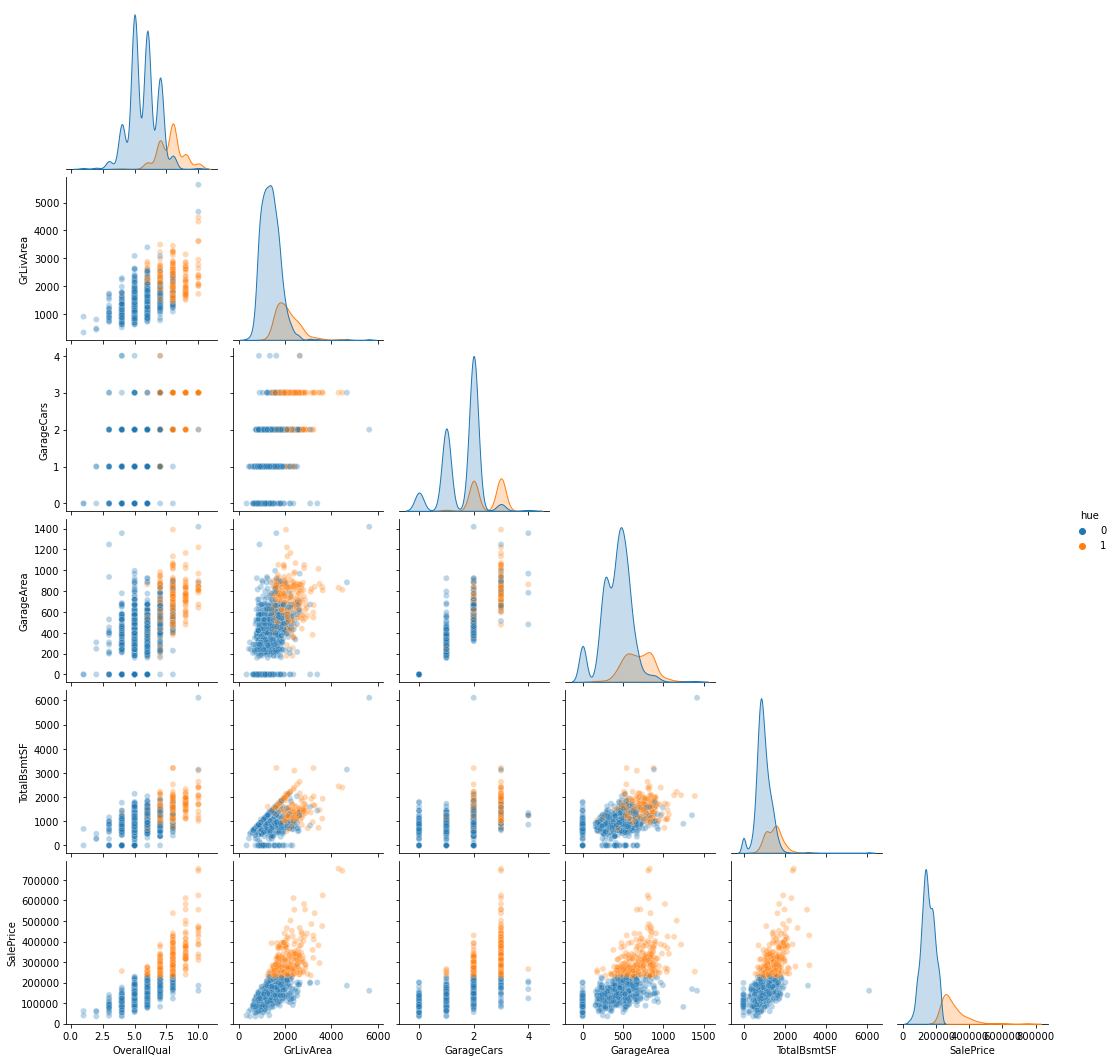

In [22]:
# Plot correlations and histograms of those columns, color with hue. This might take a while.
import seaborn as sns
sns.pairplot(
    df[corr_cols + ['hue', 'SalePrice']],
    hue='hue',
    dropna=True,
    corner=True,
    plot_kws={'alpha': 0.3}
)

plt.show()

# Baseline - accuracy if you always predict "not top 10 %"

In [23]:
1 - df.hue.mean()

0.7965753424657535

In [24]:
df_all_cols = df[num_cols + ['hue']].dropna(axis=0)
df_all_cols.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'hue'],
      dtype='object')

# Linear model with all columns

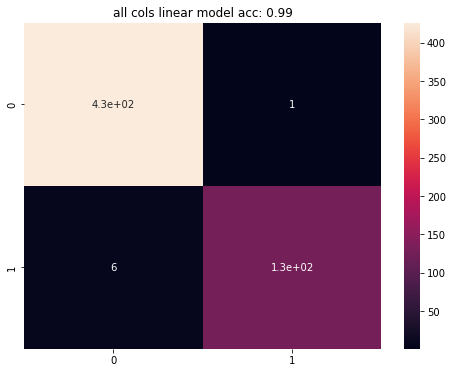

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

df_all_cols = df[num_cols + ['hue']].dropna(axis=0)

X = df_all_cols.drop('hue', axis=1)
y = df_all_cols['hue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)
all_cols_acc = clf.score(X_test, y_test)

cm = confusion_matrix(y_test, clf.predict(X_test))
fig, ax = plt.subplots(1,1,figsize=(8,6))
sns.heatmap(cm, annot=True, ax=ax)
ax.set_title('all cols linear model acc: {:.2f}'.format(all_cols_acc))
plt.show()

# show continuous loss rather than acc.

# Linear model with only top 5 most correlated columns

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_corr_cols = df[corr_cols+['hue']].dropna(axis=0)

X = df_corr_cols.drop('hue', axis=1)
y = df_corr_cols['hue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)
clf.score(X_test, y_test)
# plot?



0.9260273972602739

# Enter PCA

In [27]:
from sklearn.decomposition import PCA


X = df_all_cols
y = df_all_cols['hue']

p = PCA(n_components=2)
X_pca = p.fit_transform(X)

In [34]:
p.explained_variance_ratio_

array([0.99121238, 0.00863971])

In [28]:
X_pca_df = pd.DataFrame(X_pca)
X_pca_df['hue'] = df_all_cols['hue']

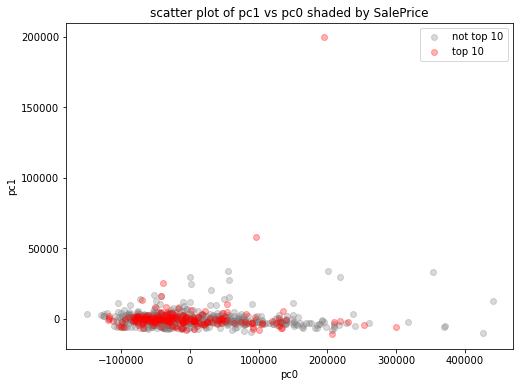

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

X_pca_top_10 = X_pca_df[X_pca_df['hue'] == 1]
X_pca_not_10 = X_pca_df[X_pca_df['hue'] == 0]


not10scatter = ax.scatter(X_pca_not_10[0], X_pca_not_10[1],
                          c='grey',
                          label='not top 10',
                          alpha=0.3)
top10scatter = ax.scatter(X_pca_top_10[0], X_pca_top_10[1],
                          c='red',
                          label='top 10',
                          alpha=0.3)
ax.set_title('scatter plot of pc1 vs pc0 shaded by SalePrice')
ax.set_xlabel('pc0')
ax.set_ylabel('pc1')
ax.legend()
plt.show()

# What Just Happened !?

## Intuition: 

#### PCA is a way to rotate the *axes* of your dataset around the *data* so that the axes line up with the *directions of the greatest variation* through the data.



# reviewed

1. exlpored Ames housing dataest
2. looked for variables that would correlate with/be good predictors for housing prices
3. indicated that PCA might be a way to approach this problem


We'll go into more detail on PCA in the next episode